<a href="https://colab.research.google.com/github/amberlynnk/PortfolioProjects/blob/main/Phoenix_Crime_Data_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [25]:
## import crime data 

crime_data = pd.read_csv('crimestat.csv')

az_zip_shp = gpd.read_file('AZ_zipcodes.shp')

az_cities_coord = pd.read_csv('AZ_cities_coords.csv')

az_zip_shp.head()



<ipython-input-25-90b083fbb090>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('crimestat.csv')


,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Zipcode,geometry
0,85019,85019,B5,G6350,S,9713482,16770,+33.5088785,-112.1445137,85019,"POLYGON ((-112.15154 33.51432, -112.15153 33.5..."
1,85020,85020,B5,G6350,S,23027500,65264,+33.5673508,-112.0535909,85020,"POLYGON ((-112.03919 33.59392, -112.03904 33.5..."
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5..."
3,85022,85022,B5,G6350,S,24230483,4009,+33.6272400,-112.0484143,85022,"POLYGON ((-112.07416 33.64750, -112.07416 33.6..."
4,85023,85023,B5,G6350,S,18927812,18972,+33.6341180,-112.0931632,85023,"POLYGON ((-112.11518 33.64381, -112.11501 33.6..."


<Axes: >

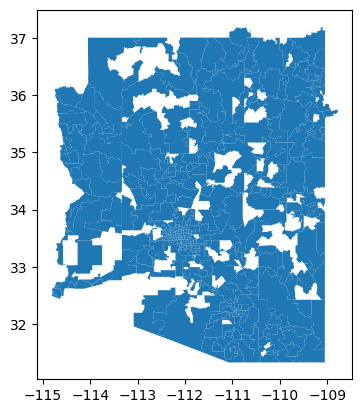

In [13]:
##plot zip 

az_zip_shp.plot()

In [17]:
##extract year out of the formatted timestamp

crime_data['Year'] = crime_data['OCCURRED ON'].str.slice(start=6, 
                                                         stop=10, 
                                                         step=1)
crime_data['Year'].head()
crime_data.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID,Year
0,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,BD30,2015
1,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,BJ30,2015
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,BI30,2015
3,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,AF12,2015
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,DA19,2015


In [18]:
## group data 

crime_data.groupby("Year").count()[["INC NUMBER"]]


,INC NUMBER
Year,
2015,10131
2016,63256
2017,66076
2018,64902
2019,68793
2020,64804
2021,64355
2022,62200
2023,14634


In [19]:
##use 2018 year for crime data 

phx_crimes_2018 = crime_data[crime_data['Year'] == "2018"]


In [20]:
## group data 

phx_crimes_2018.groupby("UCR CRIME CATEGORY").count()[["INC NUMBER"]]


,INC NUMBER
UCR CRIME CATEGORY,
AGGRAVATED ASSAULT,5391
ARSON,460
BURGLARY,9288
DRUG OFFENSE,5732
LARCENY-THEFT,33174
MOTOR VEHICLE THEFT,6910
MURDER AND NON-NEGLIGENT MANSLAUGHTER,113
RAPE,1014
ROBBERY,2820


In [21]:
## count crimes in each zipcode group 

phx_crimes_2018_zip_counts = phx_crimes_2018.groupby("ZIP",
                                                     as_index=False).count()[["ZIP","INC NUMBER"]]
phx_crimes_2018_zip_counts.head()


,ZIP,INC NUMBER
0,85003.0,868
1,85004.0,812
2,85006.0,1404
3,85007.0,1181
4,85008.0,2942


In [22]:
##change data types to integer 
phx_crimes_2018_zip_counts['ZIP'] = phx_crimes_2018_zip_counts['ZIP'].astype(int)
phx_crimes_2018_zip_counts['INC NUMBER'] = phx_crimes_2018_zip_counts['INC NUMBER'].astype(int)


<Axes: >

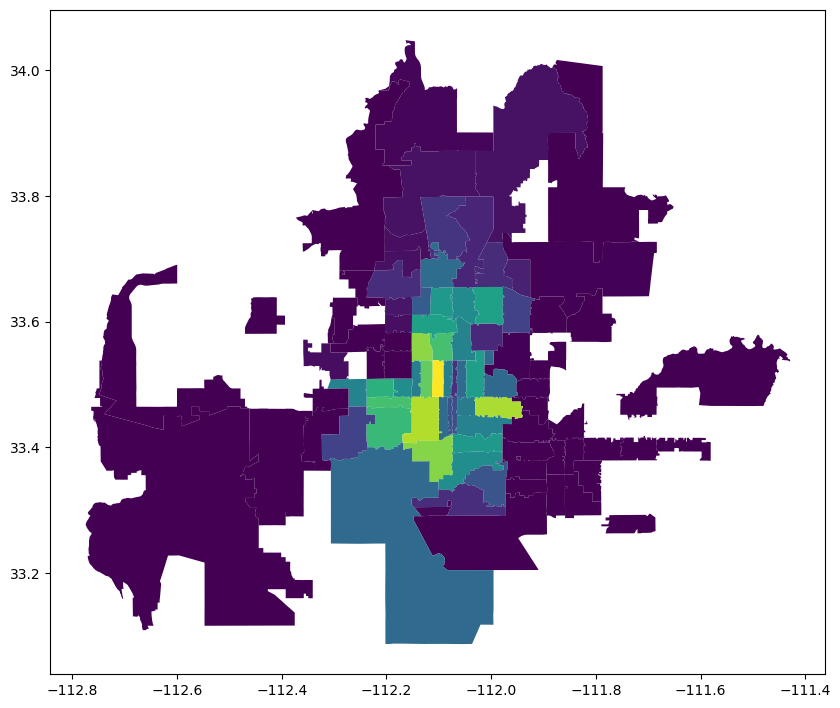

In [24]:
##joining data 

merged_phx_crimes = pd.merge(az_zip_shp,phx_crimes_2018_zip_counts, 
                             left_on='Zipcode', right_on='ZIP')

merged_phx_crimes.plot(column="INC NUMBER",figsize=(10,10))



In [29]:
phx_cities = gpd.GeoDataFrame(az_cities_coord, geometry=gpd.points_from_xy(az_cities_coord.long, 
                                                                         az_cities_coord.lat))

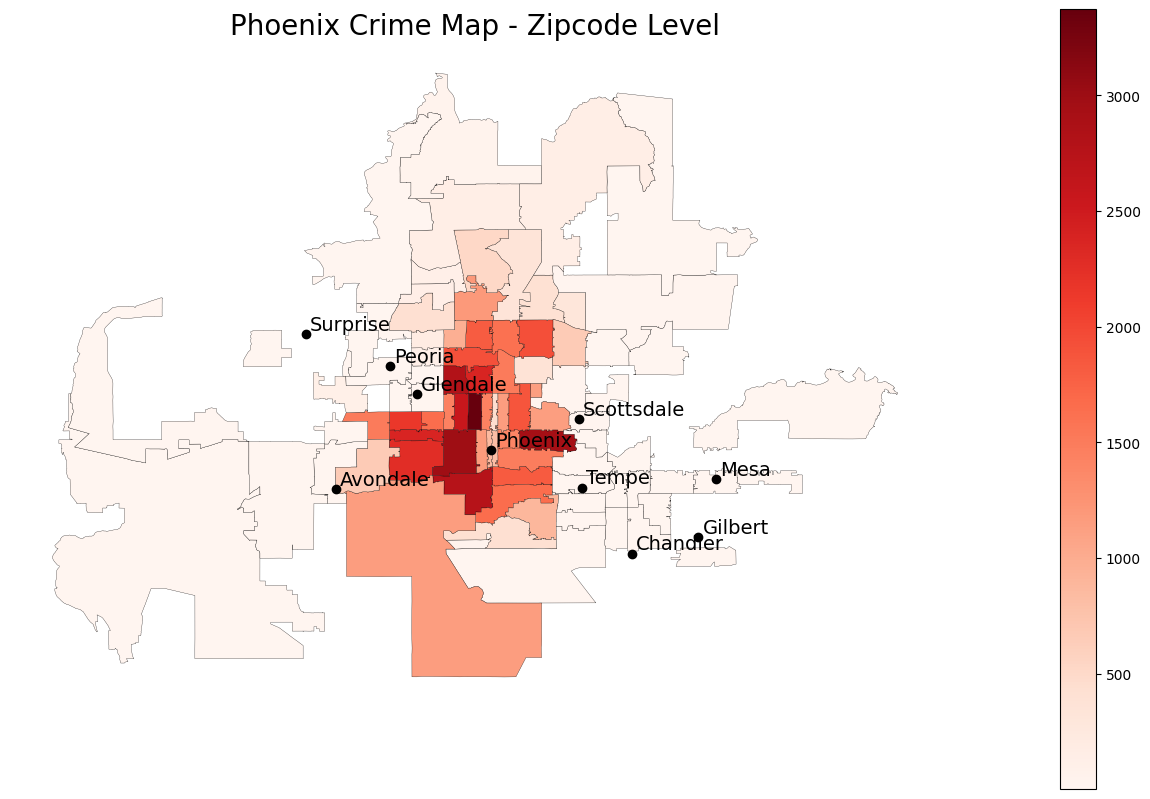

In [30]:
## professional map image 

fig, ax = plt.subplots(1, figsize=(12, 12))
merged_phx_crimes.plot(column="INC NUMBER",figsize=(10,10), ax=ax, cmap='Reds',edgecolor='black', linewidth=0.2)
phx_cities.plot(ax=ax,color="black")

vmin = merged_phx_crimes["INC NUMBER"].min()
vmax = merged_phx_crimes["INC NUMBER"].max()

plt.title("Phoenix Crime Map - Zipcode Level",fontsize=20)

for x, y, label in zip(phx_cities.geometry.x, phx_cities.geometry.y, phx_cities.PlaceName):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=14)
ax.axis('off')
    
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),cmap='Reds')
sm._A = []
cax = fig.add_axes([1, 0.15, 0.03, 0.65])
fig.colorbar(sm, cax=cax)

plt.savefig("phx_crime_map.png",dpi=400,bbox_inches='tight')